# Solution of 5.9.2, Map of Science 
### Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

- Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
- Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

### Ruth Guevara
### Biotecnologia
#### Se importa las librerias. 

In [29]:
import re
import csv
import itertools

#### Listado de países

In [20]:
with open('Datos/pubmed-covidnetwo-set.txt', errors = 'ignore') as f:
    files = f.read()

In [21]:
len(files)

6860474

In [32]:
File = re.sub(r'\n\s{6}','', files)

In [33]:
print(File[:2000])

PMID- 34427929
OWN - NLM
STAT- MEDLINE
DCOM- 20211123
LR  - 20211211
IS  - 1096-9071 (Electronic)
IS  - 0146-6615 (Print)
IS  - 0146-6615 (Linking)
VI  - 94
IP  - 1
DP  - 2022 Jan
TI  - Autoimmune complications of COVID-19.
PG  - 54-62
LID - 10.1002/jmv.27292 [doi]
AB  - Coronavirus disease 2019 (COVID-19) is still propagating a year after the start of the pandemic. Besides the complications patients face during the COVID-19 disease period, there is an accumulating body of evidence concerning the late-onset complications of COVID-19, of which autoimmune manifestations have attracted remarkable attention from the first months of the pandemic. Autoimmune hemolytic anemia, immune thrombocytopenic purpura, autoimmune thyroid diseases, Kawasaki disease, Guillain-Barre syndrome, and the detection of autoantibodies are the cues to the discovery of the potentialÂ of COVID-19 in inducing autoimmunity. Clarification of the pathophysiology of COVID-19 injuries to the host, whether it is direct vi

In [43]:
My_files = re.findall(r"\,\s[A-Z]+[A-z]{2,30}\.", File)
unique_codes = list(set(My_files))
unique_codes.sort()

In [49]:
a = unique_codes
print (a)

[', Abbvie.', ', Afghanistan.', ', Alabama.', ', Algeria.', ', Alicante.', ', Alta.', ', Argentina.', ', Arizona.', ', Arkansas.', ', Augusta.', ', Aurora.', ', Australasia.', ', Australia.', ', Austria.', ', Avda.', ', Bahrain.', ', Bangkok.', ', Bangladesh.', ', Bangor.', ', Basel.', ', Bauhausstr.', ', Belarus.', ', Belgium.', ', Birmingham.', ', Blvd.', ', Bolivia.', ', Boston.', ', Botswana.', ', Brasil.', ', Brazil.', ', Bulgaria.', ', Burlington.', ', CIBERESP.', ', Calif.', ', California.', ', Cambodia.', ', Cameroon.', ', Canada.', ', Catalonia.', ', Chicago.', ', Chile.', ', China.', ', Coimbra.', ', Colombia.', ', Colorado.', ', Columbus.', ', Conn.', ', Connecticut.', ', Croatia.', ', Cuba.', ', Cuenca.', ', Cyprus.', ', Delaware.', ', Denmark.', ', Dept.', ', Detroit.', ', Deutschland.', ', Dijon.', ', ETH.', ', Ecuador.', ', Egyp.', ', Egypt.', ', England.', ', Eritrea.', ', Estonia.', ', Ethiopia.', ', Faisalabad.', ', Fiji.', ', Finland.', ', Florida.', ', France.', ', 

In [52]:
print(r)

[', Abbvie.', ', Afghanistan.', ', Alabama.', ', Algeria.', ', Alicante.', ', Alta.', ', Argentina.', ', Arizona.', ', Arkansas.', ', Augusta.', ', Aurora.', ', Australasia.', ', Australia.', ', Austria.', ', Avda.', ', Bahrain.', ', Bangkok.', ', Bangladesh.', ', Bangor.', ', Basel.', ', Bauhausstr.', ', Belarus.', ', Belgium.', ', Birmingham.', ', Blvd.', ', Bolivia.', ', Boston.', ', Botswana.', ', Brasil.', ', Brazil.', ', Bulgaria.', ', Burlington.', ', CIBERESP.', ', Calif.', ', California.', ', Cambodia.', ', Cameroon.', ', Canada.', ', Catalonia.', ', Chicago.', ', Chile.', ', China.', ', Coimbra.', ', Colombia.', ', Colorado.', ', Columbus.', ', Conn.', ', Connecticut.', ', Croatia.', ', Cuba.', ', Cuenca.', ', Cyprus.', ', Delaware.', ', Denmark.', ', Dept.', ', Detroit.', ', Deutschland.', ', Dijon.', ', ETH.', ', Ecuador.', ', Egyp.', ', Egypt.', ', England.', ', Eritrea.', ', Estonia.', ', Ethiopia.', ', Faisalabad.', ', Fiji.', ', Finland.', ', Florida.', ', France.', ', 

In [53]:
a = "".join(unique_codes)
b = a.split(", ")
c = "".join(b)
unique_zipcodes = c.split(".")

In [55]:
print(unique_codes[:30])

[', Abbvie.', ', Afghanistan.', ', Alabama.', ', Algeria.', ', Alicante.', ', Alta.', ', Argentina.', ', Arizona.', ', Arkansas.', ', Augusta.', ', Aurora.', ', Australasia.', ', Australia.', ', Austria.', ', Avda.', ', Bahrain.', ', Bangkok.', ', Bangladesh.', ', Bangor.', ', Basel.', ', Bauhausstr.', ', Belarus.', ', Belgium.', ', Birmingham.', ', Blvd.', ', Bolivia.', ', Boston.', ', Botswana.', ', Brasil.', ', Brazil.']


In [56]:
len(unique_zipcodes)

239

In [76]:
import pandas as pd
%matplotlib inline
Coordenadas = pd.read_csv('Datos/data_Coordenadas.csv', engine='python', skipfooter=3)
Coordenadas.head(12)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [77]:
Coordenadas.columns = ["ID_País", "Latitud", "Longitud", "Nombre"]
Coordenadas.head(12)

,ID_País,Latitud,Longitud,Nombre
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [74]:
datos_nombre = Coordenadas[Coordenadas.Nombre.isin(unique_zipcodes)]
datos_paises = Coordenadas[Coordenadas.ID_País.isin(unique_zipcodes)]
all_data =pd.concat ([datos_nombre,datos_paises]).drop_duplicates().sort_values('Nombre')

In [86]:
all_data.head(25)

,ID_País,Latitud,Longitud,Nombre
2,AF,33.939110,67.709953,Afghanistan
58,DZ,28.033886,1.659626,Algeria
10,AR,-38.416097,-63.616672,Argentina
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
22,BH,25.930414,50.637772,Bahrain
18,BD,23.684994,90.356331,Bangladesh
33,BY,53.709807,27.953389,Belarus
19,BE,50.503887,4.469936,Belgium
27,BO,-16.290154,-63.588653,Bolivia


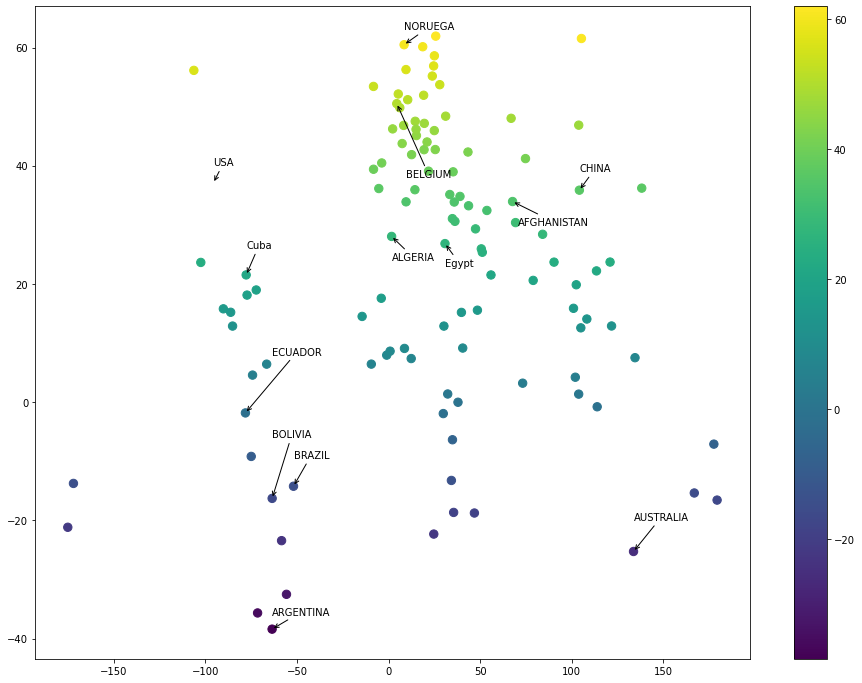

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(all_data.Longitud, all_data.Latitud, s=70, c=all_data.Latitud)
plt.colorbar()
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -20), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -9.5), arrowprops= ard)
plt.annotate('Cuba', xy = (-77.781167,21.521757 ), 
               xytext = (-77.781167, 26), arrowprops= ard)
plt.annotate('BELGIUM', xy = (4.469936, 50.503887), 
               xytext = (9.469936, 38), arrowprops = ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('NORUEGA', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)
plt.annotate('Egypt', xy = (30.802498,26.820553), 
               xytext = (30.802498, 23), arrowprops= ard)
plt.annotate('AFGHANISTAN', xy = (67.709953,33.939110), 
               xytext = (70.709953, 30), arrowprops= ard)
plt.annotate('ARGENTINA', xy = (-63.616672,	-38.416097), 
               xytext = (-63.616672, -36), arrowprops= ard)
plt.annotate('ALGERIA', xy = (1.659626,	28.033886), 
               xytext = (1.659626, 24), arrowprops= ard)
plt.annotate('BOLIVIA', xy = (-63.588653,	-16.290154), 
               xytext = (-63.588653, -6), arrowprops= ard)
plt.annotate('ECUADOR', xy = (-78.183406,	-1.831239), 
               xytext = (-63.588653, 8), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[1] * 4, plSize[1] * 3) )

plt.savefig("Map of Science.png")